In [2]:
import pandas as pd
import numpy as np

# illuminahiseq & illuminaga 데이터 불러오기
a = illuminahiseq
b = illuminaga

In [4]:
a = pd.read_table('/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminahiseq_Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/COAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [ ]:
b = pd.read_table("/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminaga_Level_3_RSEM_genes_normalized_data.2016012800.0.0/COAD.rnaseqv2__illuminaga_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt")

# 행렬 치환

In [5]:
c = a.transpose()

# 행렬 치환 후, 첫 행을 컬럼명으로 삽입

## 첫 행을 컬럼명으로 삽입 후, 실제 첫 행을 삭제

In [6]:
c.columns = c.iloc[0]

In [7]:
c = c.drop(c.columns[[0]], axis = 1)

# 인덱스 열을 삭제하고 초기화

In [9]:
c.reset_index(drop = True, inplace = True)

In [10]:
c.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
1,0.5174,18.0851,15.7640,144.4004,774.6615,0.0000,441.9729,1.9342,0.0000,0.0000,...,71.0832,461.315,1105.42,3.3849,543.037,6259.19,1358.32,798.356,13.0561,0
2,0.0000,4.4315,4.2767,142.6609,1185.2927,0.0000,522.0126,0.4838,0.0000,0.0000,...,39.671,366.715,1149.49,0.4838,290.76,4653.12,1220.13,333.817,1.9352,0.9676
3,0.0000,9.8995,11.3032,143.1987,888.3202,0.0000,288.0643,2.9245,0.0000,0.0000,...,31.4385,349.479,1083.53,0,669.713,4460.61,3002.01,530.068,2.1934,0
4,0.0000,7.9174,18.7608,146.1876,1280.5508,0.0000,379.5181,2.1515,0.0000,0.0000,...,54.6472,542.169,1374.35,0.4303,445.353,4190.19,1093.37,574.441,6.4544,0.4303


In [11]:
c = c.drop([0])

# 알 수 없는 컬럼 제거

In [12]:
test = [col for col in c if col.startswith('?')]

In [13]:
test2 = c

In [14]:
for i in test :
    test2 = test2.drop([i], axis = 1)

In [15]:
cor_matrix = test2.corr()

""


# 히트맵 source_code

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [ ]:
correlation_matrix(df)

# 거리간 상관관계 데이터 작성

## 상관관계 데이터는 R에서 작성함(Distance_Analysis_ver1.R 파일 참조할 것)

In [3]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [189]:
a = pd.read_table("/hdd/Correlation_Disance/chr01_distance_flag.csv", sep = ',')

In [114]:
b = pd.read_table("/hdd/Correlation_Disance/chr07_sense_01.csv", sep = ',')

In [172]:
a.head()

,from,to,distance,flag
0,FAM138A,LOC107985730,3315.0,HH
1,FAM138A,MIR1302-2,4107.0,HH
2,FAM138A,LOC105379212,15861.0,TT
3,FAM138A,OR4F5,33009.0,TT
4,FAM138A,LOC102725121,144967.0,TT


In [116]:
b.head()

,Unnamed: 0,from,to,distance,flag
0,0,LOC101929756,LOC100507642,66341.0,sense
1,0,LOC101929756,LOC105375115,91543.0,sense
2,0,LOC101929756,LOC105375116,92820.0,sense
3,0,LOC101929756,FAM20C,109562.0,sense
4,0,LOC101929756,LOC107986752,177574.0,sense


In [173]:
x = pd.read_table("/hdd/Correlation_Disance/corr_stack.csv", sep = ',')

In [244]:
a.head()

,from,to,distance,flag
0,FAM138A,LOC107985730,3315.0,HH
1,FAM138A,MIR1302-2,4107.0,HH
2,FAM138A,LOC105379212,15861.0,TT
3,FAM138A,OR4F5,33009.0,TT
4,FAM138A,LOC102725121,144967.0,TT


In [174]:
import multiprocessing as mp

In [175]:
x = pd.DataFrame(x)

In [176]:
x.columns = ['from', 'to', 'corr']

In [190]:
new_df = dd.merge(a, x, how = 'inner', on = ['from', 'to'])

In [191]:
new_df.head()

,from,to,distance,flag,corr
0,OR4F29,OR4F5,380731.0,HH,0.027622
1,OR4F29,SAMD11,474062.0,TT,-0.026784
2,OR4F29,KLHL17,508424.0,TT,0.131410
3,OR4F29,PLEKHN1,514141.0,TT,0.015706
4,OR4F29,ISG15,561788.0,TT,-0.089181


In [192]:
new_df = new_df.drop(['Unnamed: 0'], axis = 1)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [193]:
new_df.count()

from        846256
to          846256
distance    846256
flag        846256
corr        846256
dtype: int64

In [194]:
new_df['flag'] = new_df['flag'].astype('str')
new_df['from'] = new_df['from'].astype('str')
new_df['to'] = new_df['to'].astype('str')

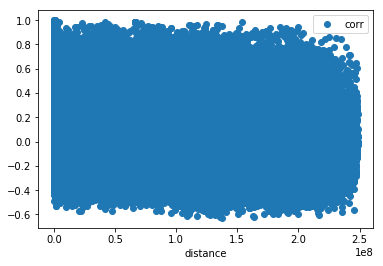

In [195]:
%matplotlib inline
new_df.plot(x='distance', y='corr', style = 'o')

In [196]:
new_df['distance'].corr(new_df['corr'])

-0.1565384515693036

In [197]:
dis5k_df = new_df[new_df['distance'] < 5000]
dis5k_df = dis5k_df[dis5k_df['distance'] > -5000]

In [198]:
dis5k_df['flag'].unique()

array(['HH', 'TT', 'minus_in_plus'], dtype=object)

In [199]:
dis5k_df.count()

from        315
to          315
distance    315
flag        315
corr        315
dtype: int64

In [200]:
dis5k_df.head()

,from,to,distance,flag,corr
3729,NOC2L,SAMD11,-379.0,HH,-0.047676
3730,NOC2L,KLHL17,803.0,TT,0.530768
8395,SDF4,B3GALT6,181.0,TT,0.118771
11192,ACAP3,SCNN1D,354.0,HH,0.382684
11193,ACAP3,PUSL1,636.0,TT,0.417146


In [271]:
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] > 0.6)]

,from,to,distance,flag,corr
33585,C1orf174,DFFB,3703.0,HH,0.638629
113831,HSPG2,LDLRAD2,-2990.0,HH,0.690670
123165,GALE,LYPLA2,59.0,HH,0.666519
479585,PI4KB,ZNF687,-109.0,HH,0.690464
488911,THEM5,LOC100132111,2935.0,HH,0.614841
584989,AIM2,IFI16,4070.0,HH,0.611351
653109,MRPS14,CACYBP,930.0,HH,0.633608


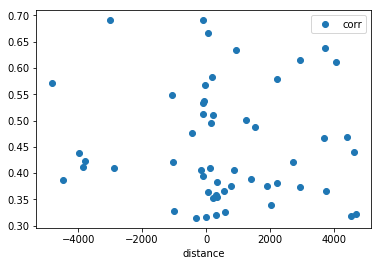

In [272]:
%matplotlib inline
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] < 0.7) & (dis5k_df_01['corr'] > 0.1)].plot(x='distance', y='corr', style = 'o')

In [273]:
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] < 0.6) & (dis5k_df_01['corr'] > 0.1)]['corr'].corr(dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] < 0.6) & (dis5k_df_01['corr'] > 0.1)]['distance'])

-0.17503753199243918

In [261]:
dis5k_df_01['flag'].unique()

array(['TT', 'HH'], dtype=object)

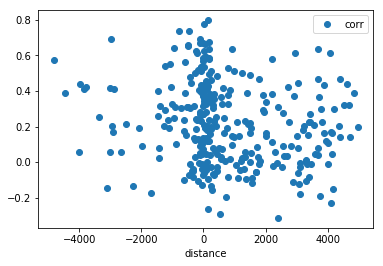

In [201]:
%matplotlib inline
dis5k_df.plot(x='distance', y='corr', style = 'o')

In [135]:
dis5k_df['distance'].corr(dis5k_df['corr'])

0.20289453943887475

In [260]:
dis5k_df['flag'].unique()

array(['HH', 'TT', 'minus_in_plus'], dtype=object)

In [211]:
dis5k_df[dis5k_df['flag'] == 'HH'].count()

from        190
to          190
distance    190
flag        190
corr        190
dtype: int64

In [205]:
dis5k_df[dis5k_df['flag'] == 'HH']['corr'].corr(dis5k_df[dis5k_df['flag'] == 'HH']['distance'])

-0.16188093086917468

In [212]:
dis5k_df[dis5k_df['flag'] == 'TT'].count()

from        124
to          124
distance    124
flag        124
corr        124
dtype: int64

In [206]:
dis5k_df[dis5k_df['flag'] == 'TT']['corr'].corr(dis5k_df[dis5k_df['flag'] == 'TT']['distance'])

-0.13175491725240937

In [207]:
dis5k_df[dis5k_df['flag'] == 'minus_in_plus']['corr'].corr(dis5k_df[dis5k_df['flag'] == 'minus_in_plus']['distance'])

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


nan

In [216]:
dis5k_df_01 = dis5k_df[(dis5k_df['corr'] >= 0.3) | (dis5k_df['corr'] <= -0.3 )]

In [217]:
dis5k_df_01.count()

from        116
to          116
distance    116
flag        116
corr        116
dtype: int64

In [166]:
dis5k_df_01.head()

,from,to,distance,flag,corr
423,SUN1,GET4,1633.0,sense,0.455619
10673,ZDHHC4,C7orf26,371.0,sense,0.695620
11861,PMS2CL,RSPH10B2,2507.0,sense,0.367364
45126,CCT6A,SUMF2,17.0,sense,0.536212
67521,LMTK2,BHLHA15,2620.0,sense,0.328514


In [242]:
dis5k_df_01.sort_values(['corr','distance'], ascending=[False,True])

,from,to,distance,flag,corr
530888,SHE,TDRD10,159.0,TT,0.797473
305119,WDR78,MIER1,7.0,TT,0.775751
62510,FBXO2,FBXO44,-457.0,TT,0.737155
391903,DRAM2,CEPT1,-781.0,TT,0.736700
113831,HSPG2,LDLRAD2,-2990.0,HH,0.690670
479585,PI4KB,ZNF687,-109.0,HH,0.690464
166092,SNRNP40,ZCCHC17,184.0,TT,0.673824
749220,INTS7,DTL,-108.0,TT,0.669081
797740,C1orf131,GNPAT,-15.0,TT,0.666854
123165,GALE,LYPLA2,59.0,HH,0.666519


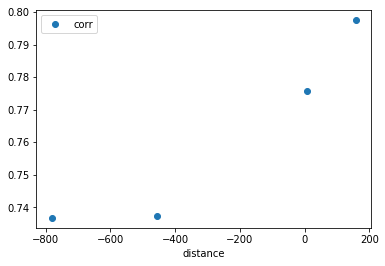

In [248]:
%matplotlib inline
dis5k_df_01[dis5k_df_01['corr'] > 0.7].plot(x='distance', y='corr', style = 'o')

In [250]:
dis5k_df_01[dis5k_df_01['corr'] > 0.7].sort_values(['distance', 'corr'], ascending = [False, True])

,from,to,distance,flag,corr
530888,SHE,TDRD10,159.0,TT,0.797473
305119,WDR78,MIER1,7.0,TT,0.775751
62510,FBXO2,FBXO44,-457.0,TT,0.737155
391903,DRAM2,CEPT1,-781.0,TT,0.736700


In [220]:
dis5k_df_01[dis5k_df_01['flag'] == 'TT'].count()

from        62
to          62
distance    62
flag        62
corr        62
dtype: int64

In [160]:
dis5k_df['flag'].unique()

array(['sense'], dtype=object)

In [226]:
dis5k_df_01.dtypes

from         object
to           object
distance    float64
flag         object
corr        float64
dtype: object

In [227]:
dis5k_df_01['flag'] = dis5k_df_01['flag'].astype('str')
dis5k_df_01['from'] = dis5k_df_01['from'].astype('str')
dis5k_df_01['to'] = dis5k_df_01['to'].astype('str')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

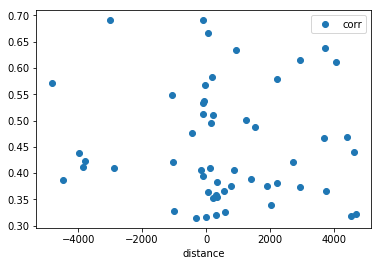

In [232]:
%matplotlib inline
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] > 0)].plot(x='distance', y='corr', style = 'o')

In [233]:
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] > 0)].count()

from        54
to          54
distance    54
flag        54
corr        54
dtype: int64

In [234]:
dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] > 0)]['distance'].corr(dis5k_df_01[(dis5k_df_01['flag'] == 'HH') & (dis5k_df_01['corr'] > 0)]['corr'])

-0.06193573777747409

In [30]:
dis5k_df_01['distance'].corr(dis5k_df_01['corr'])

-0.114228889034049

In [23]:
new_df = dd.merge(b, x, how = 'inner', on = ['from', 'to'])

In [24]:
new_df = new_df.drop(['Unnamed: 0'], axis = 1)

In [25]:
new_df['flag'] = new_df['flag'].astype('str')
new_df['from'] = new_df['from'].astype('str')
new_df['to'] = new_df['to'].astype('str')

In [26]:
dis1k_df = new_df[new_df['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [27]:
dis1k_df.count()

from        36
to          36
distance    36
flag        36
corr        36
dtype: int64

In [28]:
dis1k_df_01 = dis1k_df[(dis1k_df['corr'] >= 0.3) | (dis1k_df['corr'] <= -0.3 )]

In [274]:
%matplotlib inline
dis1k_df_01.plot(x='distance', y='corr', style = 'o')

NameError: name 'dis1k_df_01' is not defined

In [31]:
dis5k_df_01['distance'].corr(dis5k_df_01['corr'])

-0.114228889034049

## asdf

In [33]:
dis5k_df_01.head()

,from,to,distance,flag,corr
850,ADAP1,GET4,1465.0,HH,0.387295
3398,TMEM184A,MAFK,-809.0,HH_fold,0.489418
4673,SNX8,NUDT1,624.0,HH,0.410475
4674,SNX8,EIF3B,58.0,TT,0.491274
8927,PMS2,AIMP2,134.0,TT,0.487260


In [34]:
HH = dis5k_df[dis5k_df['flag'] == 'HH']
TT = dis5k_df[dis5k_df['flag'] == 'TT']
minus_in_plus = dis5k_df[dis5k_df['flag'] == 'minus_in_plus']
HH_fold = dis5k_df[dis5k_df['flag'] == 'HH_fold']

In [35]:
HH.count()

from        63
to          63
distance    63
flag        63
corr        63
dtype: int64

In [36]:
TT.count()

from        33
to          33
distance    33
flag        33
corr        33
dtype: int64

In [37]:
minus_in_plus.count()

from        3
to          3
distance    3
flag        3
corr        3
dtype: int64

In [38]:
HH_fold.count()

from        29
to          29
distance    29
flag        29
corr        29
dtype: int64

In [39]:
TT_filter = TT[(TT['corr'] >= 0.3) | (TT['corr'] <= -0.3 )]

In [40]:
HH_filter = HH[(HH['corr'] >= 0.3) | (HH['corr'] <= -0.3 )]

In [61]:
HH_filter.count()

from        26
to          26
distance    26
flag        26
corr        26
dtype: int64

In [41]:
HH_filter.loc[HH_filter['corr'].idxmax()]

from        TMEM176B
to          TMEM176A
distance        -818
flag              HH
corr        0.906677
Name: 164068, dtype: object

In [42]:
TT_reflag = pd.DataFrame()
for i in range(1, TT_filter['corr'].count()):
    t1 = TT_filter.iloc[i]
    if t1['distance'] < 0:
        t1['flag'] = 'TT_fold'
    else:
        t1['flag'] = t1['flag']
    TT_reflag = TT_reflag.append(t1)
    print(i, '/', TT_filter['distance'].count())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1 / 17
2 / 17
3 / 17
4 / 17
5 / 17
6 / 17
7 / 17
8 / 17
9 / 17
10 / 17
11 / 17
12 / 17
13 / 17
14 / 17
15 / 17
16 / 17


In [43]:
cols = TT_reflag.columns.tolist()

In [44]:
cols = cols[-2:] + cols[:-2]

In [45]:
cols

['from', 'to', 'corr', 'distance', 'flag']

In [46]:
TT_reflag = TT_reflag[cols]

In [47]:
TT_reflag

,from,to,corr,distance,flag
8927,PMS2,AIMP2,0.487260,134.0,TT
25499,HNRNPA2B1,CBX3,0.633891,417.0,TT
33989,FKBP14,PLEKHA8,0.306013,1559.0,TT
59909,PSPH,CCT6A,0.716386,80.0,TT
62898,SBDS,TYW1,0.372560,1203.0,TT
68844,DNAJC30,WBSCR22,0.586933,116.0,TT
82021,TP53TG1,CROT,0.717664,142.0,TT
85002,KRIT1,ANKIB1,0.738880,317.0,TT
89247,SGCE,PEG10,0.402255,115.0,TT
96470,PTCD1,CPSF4,0.734514,80.0,TT


In [71]:
TT.count()

from        33
to          33
distance    33
flag        33
corr        33
dtype: int64

In [49]:
import matplotlib

In [56]:
TT_reflag.dtypes

from         object
to           object
corr        float64
distance    float64
flag         object
dtype: object

In [57]:
TT_reflag['flag'] = TT_reflag['flag'].astype('str')
TT_reflag['from'] = TT_reflag['from'].astype('str')
TT_reflag['to'] = TT_reflag['to'].astype('str')

In [59]:
TT_reflag['flag'].unique()

array(['TT'], dtype=object)

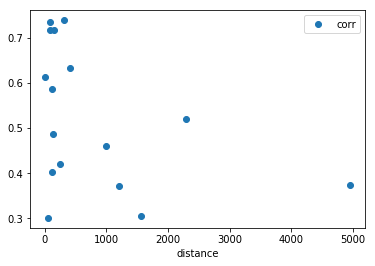

In [67]:
%matplotlib inline
TT_reflag.plot(x='distance', y='corr', style = 'o')

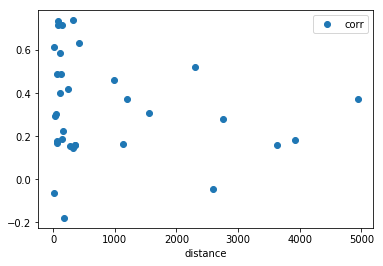

In [68]:
%matplotlib inline
TT.plot(x='distance', y='corr', style = 'o')

In [61]:
TT_reflag.count()

from        16
to          16
corr        16
distance    16
flag        16
dtype: int64

In [62]:
TT_reflag[TT_reflag['flag'] == 'TT'].count()

from        16
to          16
corr        16
distance    16
flag        16
dtype: int64

In [63]:
TT_reflag['distance'].corr(TT_reflag['corr'])

-0.4029823142177264

In [69]:
TT['distance'].corr(TT['corr'])

-0.17441533435959017

In [64]:
TT_reflag[TT_reflag['flag'] == 'TT']['distance'].corr(TT_reflag[TT_reflag['flag'] == 'TT']['corr'])

-0.4029823142177264

In [81]:
HH_reflag[HH_reflag['flag'] == 'HH_fold'].count()

NameError: name 'HH_reflag' is not defined

In [59]:
TT_filter = TT[(TT['corr'] >= 0.3) | (TT['corr'] <= -0.3 )]

In [60]:
TT_filter.count()

from        52
to          52
distance    52
flag        52
corr        52
dtype: int64

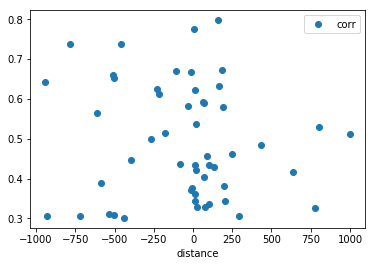

In [61]:
%matplotlib inline
TT_filter.plot(x='distance', y='corr', style = 'o')

In [62]:
TT_filter['distance'].corr(TT_filter['corr'])

-0.08195167175360099

In [72]:
HH_filter['distance'].corr(HH_filter['corr'])

-0.28262720110140815

In [77]:
HH['distance'].corr(HH['corr'])

-0.41173023190876323

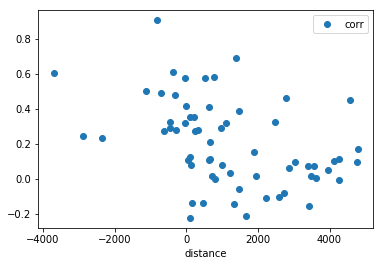

In [76]:
%matplotlib inline
HH.plot(x='distance', y='corr', style = 'o')

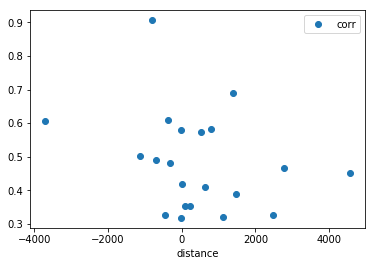

In [73]:
%matplotlib inline
HH_filter.plot(x='distance', y='corr', style = 'o')

In [74]:
HH.count()

from        63
to          63
distance    63
flag        63
corr        63
dtype: int64

In [75]:
HH_filter.count()

from        21
to          21
distance    21
flag        21
corr        21
dtype: int64